In [20]:
# Import required packages
import requests
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Specifying Debtor Country & Creditor Country to check data
debtorCountry = input("Enter Debtor Country Code \n")
creditorCountry = input("Enter Creditor Country Code \n")
series = "DT.DOD.BLAT.CD"
time = "All"

Enter Debtor Country Code 
PAK
Enter Creditor Country Code 
730


In [22]:
# Setting up the API URL
url = "http://api.worldbank.org/v2/sources/6/country/"
end = "?format=json&per_page=500"
path = url+debtorCountry+"/series/"+series+"/counterpart-area/"+creditorCountry+"/time/"+time+end

# Creating a funtion that will parse through the JSON response
def getData(JSON):
    df = pd.DataFrame(columns=["year", "creditor", "debtor", "indicator","data"])
    for i in range(0,listLen):
        time = JSON["source"]["data"][i]["variable"][1]["value"]
        num = JSON["source"]["data"][i]["value"]
        df = df.append({"year":time, "creditor": creditorCountry, 
                        "debtor":debtorCountry, "indicator":series, "data":num
                       }, ignore_index = True)
    return(df)

In [23]:
path

'http://api.worldbank.org/v2/sources/6/country/PAK/series/DT.DOD.BLAT.CD/counterpart-area/730/time/All?format=json&per_page=500'

In [24]:
# Getting the data from the API
custom = requests.get(path)
customJSON = custom.json()
listLen = int(len(customJSON["source"]["data"]))

In [26]:
# Plugging the data into the parsing function and printing the data
IDSdata = getData(customJSON)
datatoexcel = pd.ExcelWriter(f'{debtorCountry}-{creditorCountry} PPG Bilateral Debt.xlsx')
IDSdata.to_excel(datatoexcel)
datatoexcel.save()
print("Excel File Saved")

Excel File Saved


In [30]:
source = IDSdata.dropna()

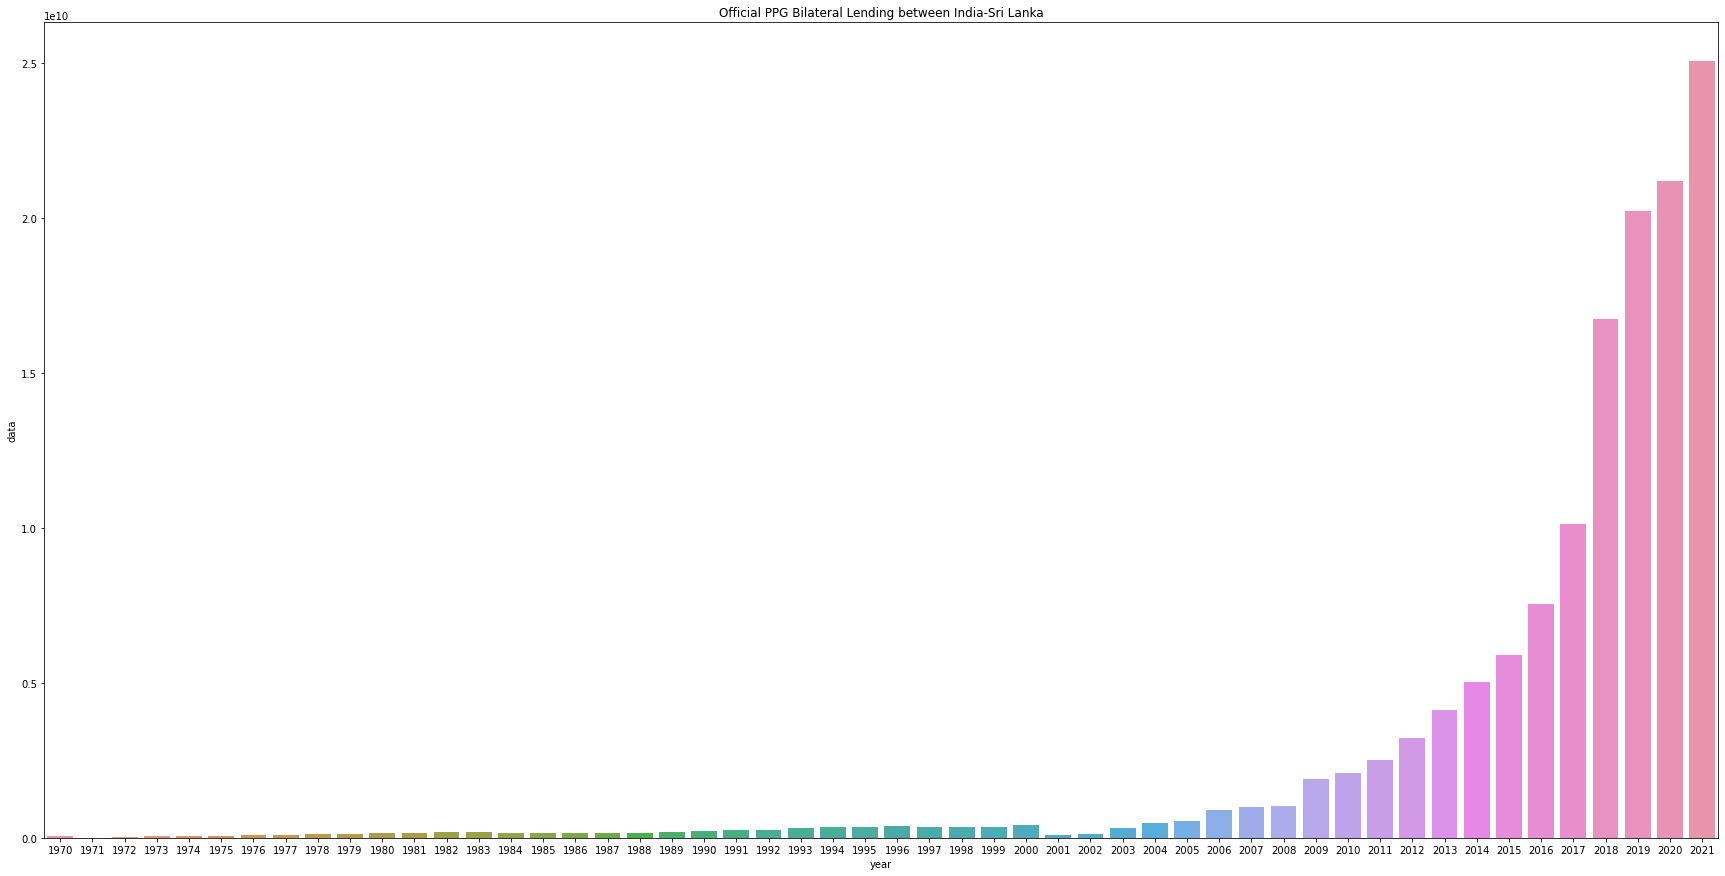

In [29]:
# Selecting the dataframe created above as the data source for the chart
source = IDSdata.dropna()


# Plugging in the datasource, X and Y indicators, and the title for the chart
plt.figure(figsize=(30,15))
plt.xlabel('Year')
plt. ylabel('Debt in Billion US$')
plt.title('Official PPG Bilateral Lending between China-pakistan Lanka')
# chart = sns.barplot(data = source, x= "year", y="data")
# chart.set(xlabel='Year', ylabel='Debt in Billion US$', title='Official PPG Bilateral Lending between India-Sri Lanka')
sns.barplot(data = source, x= "year", y="data")
# Displaying the chart
plt.show()